In [1]:
from src.eeg_data_utils import EegDataProcessor
from src.audio_data_utils import  AudioDataProcessor

In [2]:
filepathEeg = '/home/owaismujtaba/BIDSSpeechDatset/rawData/F10/VCV/GOMEZCARMONA~ _67e7880a-4065-4e37-a165-58982f5f8c3c.edf'
filepathAudio = '/home/owaismujtaba/BIDSSpeechDatset/rawData/F10/VCV/sub-MartaGomezCarmona_ses-VCV_Ses01_task-Default_run-001_eeg.xdf'

In [3]:
eegData = EegDataProcessor(filepathEeg)
#audioData = AudioData(filepathAudio)

*******************Loading /home/owaismujtaba/BIDSSpeechDatset/rawData/F10/VCV/GOMEZCARMONA~ _67e7880a-4065-4e37-a165-58982f5f8c3c.edf File*******************
Extracting EDF parameters from /home/owaismujtaba/BIDSSpeechDatset/rawData/F10/VCV/GOMEZCARMONA~ _67e7880a-4065-4e37-a165-58982f5f8c3c.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3055871  =      0.000 ...  5968.498 secs...
*******************Loaded /home/owaismujtaba/BIDSSpeechDatset/rawData/F10/VCV/GOMEZCARMONA~ _67e7880a-4065-4e37-a165-58982f5f8c3c.edf File*******************
****************Normalizing Triggers********************
****************Correcting Triggers********************
**************** Calculating EEG Transition Indexes********************
***************************Mapping EEG events***************************
***************************EEG events mapped***************************


In [4]:
eegData.eegEvents[:5]

[['ExperimentEnded', None, 1656410768.0, 4636, 0],
 ['StartBlockSaying', 'Overt', 1656410777.0546875, 1007, 4636],
 ['StartReading', 'Overt', 1656410779.0214844, 769, 5643],
 ['ITI', 'Overt', 1656410780.5234375, 795, 6412],
 ['StartSaying', 'Overt', 1656410782.0761719, 769, 7207]]

In [5]:
eegData.triggers.shape

(3055872,)

In [6]:
from matplotlib import pyplot as plt

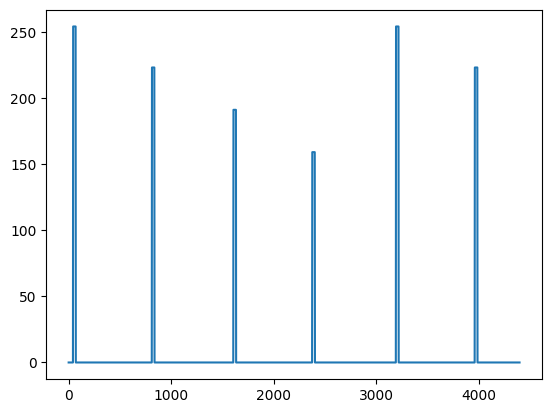

In [7]:
plt.plot(eegData.triggersNormalized[5600:10000])

In [8]:
eegData.eegEvents[0:120]

[['ExperimentEnded', None, 1656410768.0, 4636, 0],
 ['StartBlockSaying', 'Overt', 1656410777.0546875, 1007, 4636],
 ['StartReading', 'Overt', 1656410779.0214844, 769, 5643],
 ['ITI', 'Overt', 1656410780.5234375, 795, 6412],
 ['StartSaying', 'Overt', 1656410782.0761719, 769, 7207],
 ['Fixation', 'Overt', 1656410783.578125, 817, 7976],
 ['StartReading', 'Overt', 1656410785.1738281, 769, 8793],
 ['ITI', 'Overt', 1656410786.6757812, 841, 9562],
 ['StartSaying', 'Overt', 1656410788.3183594, 770, 10403],
 ['Fixation', 'Overt', 1656410789.8222656, 1016, 11173],
 ['StartReading', 'Overt', 1656410791.8066406, 769, 12189],
 ['ITI', 'Overt', 1656410793.3085938, 786, 12958],
 ['StartSaying', 'Overt', 1656410794.84375, 770, 13744],
 ['Fixation', 'Overt', 1656410796.3476562, 950, 14514],
 ['StartReading', 'Overt', 1656410798.203125, 769, 15464],
 ['ITI', 'Overt', 1656410799.7050781, 893, 16233],
 ['StartSaying', 'Overt', 1656410801.4492188, 770, 17126],
 ['Fixation', 'Overt', 1656410802.953125, 931,

In [9]:
audioData = AudioDataProcessor(filepathAudio)

*********************************************************************************
***************************Loading .xdf file***************************
*******************************Completed*******************************
***************************Loading Audio data***************************
***************************Mapping Audio events***************************
***************************Audio events mapped***************************


In [19]:
audioData.audioEvents[:5]

[['ExperimentStarted', None, 1656403961.8758688, 9, 1647646],
 ['StartBlockSaying', 'Overt', 1656403961.876073, 71659, 1647655],
 ['StartReading:UKU', 'Overt', 1656403963.5009758, 66285, 1719314],
 ['ITI', 'Overt', 1656403965.0040205, 78895, 1785599],
 ['StartSaying:UKU', 'Overt', 1656403966.793003, 66262, 1864494]]

In [17]:
eegData.eegEvents[:4]

[['ExperimentEnded', None, 1656410768.0, 4636, 0],
 ['StartBlockSaying', 'Overt', 1656410777.0546875, 1007, 4636],
 ['StartReading', 'Overt', 1656410779.0214844, 769, 5643],
 ['ITI', 'Overt', 1656410780.5234375, 795, 6412]]

In [13]:
len(audioData.audioEvents), len(eegData.eegEvents)

(1720, 2560)

In [38]:
eegEvents = eegData.eegEvents
audioEvents = audioData.audioEvents

In [75]:
audioEventTrackingIndex = 0
synchronizedEvents = []
words = []
for audioindex in range(len(audioEvents)):
    audioEvent = audioEvents[audioindex][0].split(":")
    try:
        word = audioEvent[1]
    except:
        word = None
    audioEvent = audioEvent[0] 
    block = audioEvents[audioindex][1]
    audioOnset = audioEvents[audioindex][2] 
    audioOnsetIndex = audioEvents[audioindex][4]
    audioDuration = audioEvents[audioindex][3]
    if 'StartReading' in audioEvent or 'StartSaying'in audioEvent:
        for eegIndex in range(audioEventTrackingIndex, len(eegEvents)):
            eegEvent = eegEvents[eegIndex][0]
            eegOnset = eegEvents[eegIndex][2]
            eegOnsetIndex = eegEvents[eegIndex][4]
            eegDuration = eegEvents[eegIndex][3]
            if eegEvent == audioEvent:
                words.append(word)
                print(audioEvents[audioindex], eegEvents[eegIndex], word)
                audioEventTrackingIndex = eegIndex + 1
                #synchronizedEvents.append([audioEvents[audioindex], eegEvents[eegIndex], word])
                synchronizedEvents.append([eegEvent, block, audioOnset, audioDuration, audioOnsetIndex, eegOnset, eegDuration, eegOnsetIndex, word ])
                break
    else:
        continue
    
    

['StartReading:UKU', 'Overt', 1656403963.5009758, 66285, 1719314] ['StartReading', 'Overt', 1656410779.0214844, 769, 5643] UKU
['StartSaying:UKU', 'Overt', 1656403966.793003, 66262, 1864494] ['StartSaying', 'Overt', 1656410782.0761719, 769, 7207] UKU
['StartReading:IFI', 'Overt', 1656403970.3091776, 66224, 2019559] ['StartReading', 'Overt', 1656410785.1738281, 769, 8793] IFI
['StartSaying:IFI', 'Overt', 1656403973.7580287, 66266, 2171655] ['StartSaying', 'Overt', 1656410788.3183594, 770, 10403] IFI
['StartReading:AFA', 'Overt', 1656403977.249918, 66224, 2325649] ['StartReading', 'Overt', 1656410791.8066406, 769, 12189] AFA
['StartSaying:AFA', 'Overt', 1656403980.3123786, 66249, 2460705] ['StartSaying', 'Overt', 1656410794.84375, 770, 13744] AFA
['StartReading:UMU', 'Overt', 1656403983.5013006, 66261, 2601338] ['StartReading', 'Overt', 1656410798.203125, 769, 15464] UMU
['StartSaying:UMU', 'Overt', 1656403986.570768, 66266, 2736703] ['StartSaying', 'Overt', 1656410801.4492188, 770, 1712

In [76]:
synchronizedEvents

[[['StartReading:UKU', 'Overt', 1656403963.5009758, 66285, 1719314],
  ['StartReading', 'Overt', 1656410779.0214844, 769, 5643],
  'UKU'],
 [['StartSaying:UKU', 'Overt', 1656403966.793003, 66262, 1864494],
  ['StartSaying', 'Overt', 1656410782.0761719, 769, 7207],
  'UKU'],
 [['StartReading:IFI', 'Overt', 1656403970.3091776, 66224, 2019559],
  ['StartReading', 'Overt', 1656410785.1738281, 769, 8793],
  'IFI'],
 [['StartSaying:IFI', 'Overt', 1656403973.7580287, 66266, 2171655],
  ['StartSaying', 'Overt', 1656410788.3183594, 770, 10403],
  'IFI'],
 [['StartReading:AFA', 'Overt', 1656403977.249918, 66224, 2325649],
  ['StartReading', 'Overt', 1656410791.8066406, 769, 12189],
  'AFA'],
 [['StartSaying:AFA', 'Overt', 1656403980.3123786, 66249, 2460705],
  ['StartSaying', 'Overt', 1656410794.84375, 770, 13744],
  'AFA'],
 [['StartReading:UMU', 'Overt', 1656403983.5013006, 66261, 2601338],
  ['StartReading', 'Overt', 1656410798.203125, 769, 15464],
  'UMU'],
 [['StartSaying:UMU', 'Overt', 165

In [67]:
from collections import  Counter
groups = Counter(words)

In [73]:
lengths = []
for item, key in groups.items():
    lengths.append(key)
    

In [74]:
import numpy as np
np.unique(lengths)

array([16])